In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_pickle("Brain_data.pkl")

print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:  114
Columns:  2428


In [3]:
# variables : Neuroticm Extraversion Openness Agreeableness Conscientiousness FSIQ CAQ

target_variable = 'Sex'


In [4]:
# Function to categorize the 5 personality values in LOW, MEDIUM, HIGH

def categorizePersonaVal(arr):
    copy = np.array(arr)
    copy.sort()
    n = len(copy)//3
    split1 = copy[n]
    split2 = copy[2*n]
    for i in range(len(arr)):
        if arr[i] <= split1:
            arr[i] = 0
        elif arr[i] <=split2 and arr[i] > split1:
            arr[i] = 1
        elif arr[i] <=copy[-1] and arr[i] > split1:
            arr[i] = 2
        else:
            arr[i] = 0
    return arr

In [5]:
df[target_variable] = categorizePersonaVal(df[target_variable])

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,2303,2304,2305,2306,2307,2308,2309,2310,2311,2312,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353,2354,2355,2356,2357,2358,2359,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,URSI,CCI,Sex,Age,Subject_type,FSIQ,CAQ,Neuroticm,Extraversion,Openness,Agreeableness,Conscientiousness
0,5619.0,1778.0,18057.0,22818.0,13.0,6869.0,2458.0,1334.0,4795.0,15577.0,271.0,5889.0,4.0,1712.0,1937.0,7205.0,3449.0,3674.0,54.0,3720.0,22.0,4474.0,15042.0,21144.0,8867.0,4380.0,3156.0,7089.0,6062.0,9631.0,6210.0,0.0,140.0,5906.0,22850.0,444.0,1973.0,5165.0,20844.0,0.0,922.0,0.0,0.0,0.0,3777.0,0.0,1176.0,0.0,989.0,0.0,1074.0,4871.0,1656.0,0.0,298.0,0.0,188.0,11549.0,13219.0,1348.0,2178.0,407.0,11380.0,0.0,502.0,112.0,0.0,0.0,16.0,0.0,646.0,480.0,37.0,330.0,1905.0,4239.0,8754.0,985.0,845.0,0.0,320.0,0.0,6197.0,299.0,1056.0,0.0,0.0,0.0,12.0,614.0,672.0,2106.0,1401.0,0.0,0.0,389.0,947.0,13660.0,5093.0,0.0,0.0,5418.0,304.0,8.0,0.0,0.0,419.0,0.0,0.0,0.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,18.0,278.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,27.0,0.0,6554.0,8573.0,5645.0,0.0,0.0,0.0,12.0,0.0,0.0,19.0,28.0,41.0,2146.0,0.0,0.0,0.0,889.0,0.0,195.0,0.0,0.0,51.0,763.0,9270.0,1272.0,0.0,0.0,267.0,5299.0,94.0,7551.0,0.0,0.0,60.0,20068.0,5054.0,12.0,59.0,17210.0,462.0,23.0,1037.0,0.0,0.0,181.0,7236.0,16.0,105.0,18739.0,4187.0,165.0,10612.0,0.0,0.0,433.0,165.0,0.0,785.0,11303.0,176.0,2542.0,0.0,0.0,445.0,6890.0,6144.0,0.0,0.0,0.0,69.0,0.0,0.0,12751.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,74.0,777.0,94.0,0.0,253.0,2.0,5493.0,0.0,0.0,21.0,1232.0,0.0,323.0,2181.0,0.0,0.0,1627.0,0.0,0.0,0.0,M87102217,M87102217,111.08,0,20,1,123,42.0,20,34,43,30,30
1,3804.0,1705.0,9629.0,16300.0,0.0,4953.0,1292.0,1317.0,3640.0,3070.0,149.0,2616.0,41.0,358.0,1881.0,8373.0,7689.0,3079.0,0.0,2153.0,521.0,4433.0,8071.0,24494.0,15085.0,3080.0,2375.0,7427.0,12269.0,6107.0,6013.0,0.0,70.0,2705.0,16280.0,397.0,1781.0,1440.0,11450.0,0.0,201.0,97.0,0.0,8.0,3977.0,0.0,882.0,0.0,960.0,0.0,1035.0,5293.0,212.0,0.0,56.0,0.0,2728.0,5658.0,6423.0,668.0,2229.0,1104.0,2504.0,908.0,0.0,381.0,0.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0,2155.0,4671.0,7117.0,453.0,567.0,0.0,171.0,0.0,5095.0,79.0,497.0,0.0,0.0,0.0,535.0,34.0,0.0,537.0,1230.0,0.0,0.0,0.0,1110.0,10505.0,5779.0,0.0,0.0,4561.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,245.0,0.0,6.0,0.0,159.0,0.0,0.0,0.0,0.0,91.0,181.0,0.0,2731.0,6622.0,5502.0,0.0,1.0,0.0,8.0,0.0,0.0,8.0,0.0,0.0,2304.0,0.0,0.0,0.0,392.0,2.0,343.0,0.0,0.0,10.0,3440.0,10249.0,943.0,0.0,0.0,1066.0,6342.0,91.0,7413.0,0.0,0.0,3.0,17956.0,5171.0,93.0,96.0,13881.0,1227.0,6.0,30.0,0.0,0.0,0.0,9966.0,121.0,243.0,13302.0,2499.0,48.0,7769.0,0.0,0.0,4.0,29.0,0.0,2127.0,12956.0,15.0,2445.0,0.0,0.0,26.0,3263.0,3446.0,0.0,0.0,0.0,0.0,0.0,0.0,12841.0,0.0,0.0,0.0,870.0,0.0,0.0,0.0,36.0,55.0,644.0,0.0,0.0,4.0,7349.0,0.0,0.0,5.0,1292.0,0.0,191.0,2470.0,0.0,0.0,661.0,0.0,0.0,0.0,M87102806,M87102806,83.49,0,20,0,108,3.0,11,21,34,17,32
2,6218.0,2732.0,29416.0,18178.0,0.0,6332.0,4957.0,2955.0,4736.0,9109.0,1040.0,6232.0,845.0,987.0,2385.0,8893.0,10656.0,6354.0,95.0,1797.0,0.0,3226.0,12892.0,29323.0,15180.0,5546.0,2749.0,23912.0,11680.0,11535.0,6483.0,38.0,98.0,4294.0,21876.0,811.0

19    25
21    16
20    11
18    11
22    10
23     9
26     7
25     7
24     7
27     5
28     4
29     2
Name: Age, dtype: int64


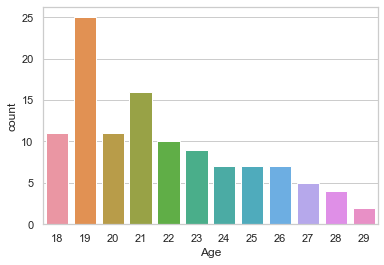

In [7]:
print(df.Age.value_counts())
ax = sns.countplot(df.Age,label="Count")

1    64
0    50
Name: Sex, dtype: int64


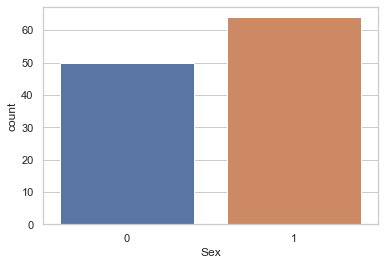

In [8]:
print(df[target_variable].value_counts())
ax = sns.countplot(df[target_variable],label="Count")

In [9]:
new_df = pd.DataFrame(columns=['ColumnName', 'Null_Count_%', 'Distinct_Values', 'Min', 'Mean', 'Max', 'dtype'])
i = 0
#print(df.shape[0])
for item in df.columns:
    if(df[item].dtype == 'object'):
        new_df.loc[i] = [item, df[item].isnull().sum()/df.shape[0] * 100, df[item].nunique(), "Na", "Na", "Na", df[item].dtype]
    else:
        new_df.loc[i] = [item, df[item].isnull().sum()/df.shape[0] * 100, df[item].nunique(), df[item].min(), df[item].mean(), df[item].max(), df[item].dtype]
    
    i=i+1
print("Column Information: ")
new_df

Column Information: 


,ColumnName,Null_Count_%,Distinct_Values,Min,Mean,Max,dtype
0,0,0.000000,114,392,4644.75,11297,float64
1,1,0.000000,113,122,2299.08,6216,float64
2,2,0.000000,114,8459,19913.6,34711,float64
3,3,0.000000,112,6279,15513.6,31591,float64
4,4,0.000000,17,0,5.28947,121,float64
5,5,0.000000,111,932,5875.78,10933,float64
6,6,0.000000,113,682,3165.96,9499,float64
7,7,0.000000,110,59,1959.01,6635,float64
8,8,0.000000,113,399,3810.25,9515,float64
9,9,0.000000,113,1351,8097.04,24390,float64


In [10]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation equal to 1
to_drop = [column for column in upper.columns if any(upper[column] == 1)]

In [11]:
len(to_drop)

89

In [12]:
# Drop features 
df = df.drop(df[to_drop], axis=1)

In [13]:
df.shape

(114, 2339)

In [14]:
feature_name = df.columns.tolist()
drop_columns = feature_name[-13:]

In [15]:
y = df[target_variable]
X = df.drop(labels=drop_columns, axis = 1)
feature_name = X.columns.tolist()

In [16]:
# PCA 

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 61)
pca.fit(X)
print("Variance Preserved:",pca.explained_variance_ratio_.sum())
p = pca.transform(X)
dataset = pd.DataFrame(p)
dataset[target_variable] = df[target_variable]
dataset.to_pickle("BrainDataPCA.pkl")

Variance Preserved: 0.9501228966107554


# Pearson Correlation

In [18]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-250:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [19]:
cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

250 selected features


# Chi-2

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=250)
chi_selector.fit(X_norm, y)

SelectKBest(k=250, score_func=<function chi2 at 0x000001E83956E268>)

In [21]:
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

250 selected features


# Recursive Feature Elimination

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=250, step=20, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 2326 features.
Fitting estimator with 2306 features.
Fitting estimator with 2286 features.
Fitting estimator with 2266 features.
Fitting estimator with 2246 features.
Fitting estimator with 2226 features.
Fitting estimator with 2206 features.
Fitting estimator with 2186 features.
Fitting estimator with 2166 features.
Fitting estimator with 2146 features.
Fitting estimator with 2126 features.
Fitting estimator with 2106 features.
Fitting estimator with 2086 features.
Fitting estimator with 2066 features.
Fitting estimator with 2046 features.
Fitting estimator with 2026 features.
Fitting estimator with 2006 features.
Fitting estimator with 1986 features.
Fitting estimator with 1966 features.
Fitting estimator with 1946 features.
Fitting estimator with 1926 features.
Fitting estimator with 1906 features.
Fitting estimator with 1886 features.
Fitting estimator with 1866 features.
Fitting estimator with 1846 features.
Fitting estimator with 1826 features.
Fitting esti

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=250, step=20, verbose=5)

In [23]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

250 selected features


# Logistic Regression (Select from model)

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), threshold='0.00000001*median')
embeded_lr_selector.fit(X_norm, y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False,
                threshold='0.00000001*median')

In [25]:
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

2326 selected features


# Random forest (Select from model)

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold=0.0014)
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [27]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

238 selected features


# LightGBM

In [28]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=250)
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt',
                                         class_weight=None,
                                         colsample_bytree=0.2,
                                         importance_type='split',
                                         learning_rate=0.05, max_depth=-1,
                                         min_child_samples=20,
                                         min_child_weight=40,
                                         min_split_gain=0.01, n_estimators=500,
                                         n_jobs=-1, num_leaves=32,
                                         objective=None, random_state=None,
                                         reg_alpha=3, reg_lambda=1, silent=True,
                                         subsample=1.0,
                                         subsample_for_bin=200000,
                                         subsample_freq=0),
                max_features=250, norm_order=1, prefit=False,

In [29]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

250 selected features


# Conclusion

In [30]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 
                                    'RandomForest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df[['Pearson', 'Chi-2', 'RFE', 'RandomForest', 'LightGBM']], axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(250)

,Feature,Pearson,Chi-2,RFE,RandomForest,LightGBM,Total
1,25,True,True,True,True,True,5
2,17,True,True,True,True,True,5
3,11,True,True,True,True,True,5
4,2369,True,True,True,True,False,4
5,2362,True,True,True,True,False,4
6,2303,True,True,True,True,False,4
7,2295,True,True,True,True,False,4
8,2168,True,True,True,True,False,4
9,2102,True,True,True,True,False,4
10,1970,True,True,True,True,False,4


In [31]:
selected_feature = feature_selection_df.loc[feature_selection_df['Total'] > 2]['Feature']

In [32]:
df_selected = df[selected_feature].copy()
df_selected.head()

,25,17,11,2369,2362,2303,2295,2168,2102,1970,1844,1831,1542,1519,1425,1381,1372,1247,1082,769,502,487,410,339,247,226,169,154,146,60,19,13,2372,2360,2341,2324,2319,2302,2282,2279,2266,2239,2214,2191,2126,2110,2095,2051,2050,2040,1982,1940,1939,1937,1921,1846,1840,1838,1822,1683,1596,1560,1460,1438,1418,1371,1365,1363,1293,1263,1251,1095,1048,928,826,775,713,540,517,414,358,350,340,261,229,228,227,221,220,214,197,161,160,157,156,151,148,138,80,75,28,12,9,2,0
0,4380.0,3674.0,5889.0,433.0,105.0,0.0,991.0,1937.0,53.0,4013.0,13373.0,6326.0,15.0,4140.0,42.0,0.0,7.0,0.0,1948.0,3033.0,0.0,45.0,0.0,80.0,242.0,1206.0,5990.0,2760.0,211.0,2178.0,3720.0,1712.0,785.0,7236.0,0.0,19.0,0.0,1025.0,44.0,0.0,5428.0,5409.0,0.0,2210.0,518.0,7545.0,8585.0,62.0,3275.0,6005.0,123.0,150.0,11517.0,356.0,112.0,5115.0,77.0,244.0,13108.0,0.0,9348.0,7748.0,19.0,1611.0,8048.0,0.0,4.0,1056.0,6391.0,4.0,0.0,0.0,5297.0,0.0,1927.0,4123.0,4580.0,7514.0,37.0,0.0,885.0,1846.0,1036.0,1336.0,1344.0,22052.0,7388.0,0.0,1983.0,0.0,9401.0,6739.0,1484.0,1297.0,0.0,0.0,0.0,10918.0,320.0,4239.0,6062.0,4.0,15577.0,18057.0,5619.0
1,3080.0,3079.0,2616.0,4.0,243.0,245.0,527.0,1646.0,81.0,2984.0,15696.0,2690.0,0.0,817.0,37.0,0.0,31.0,443.0,2719.0,2080.0,0.0,2.0,251.0,0.0,6.0,108.0,2893.0,1662.0,17.0,2229.0,2153.0,358.0,2127.0,9966.0,0.0,8.0,1.0,1984.0,839.0,0.0,6953.0,3802.0,0.0,2946.0,1873.0,5456.0,5613.0,68.0,3250.0,7469.0,479.0,1274.0,12044.0,1777.0,323.0,2841.0,39.0,1.0,9421.0,0.0,7536.0,7684.0,30.0,513.0,3704.0,14.0,24.0,35.0,3347.0,0.0,0.0,242.0,3696.0,0.0,2158.0,2804.0,3106.0,5584.0,0.0,83.0,745.0,1136.0,1332.0,25.0,1686.0,20407.0,6579.0,51.0,1286.0,0.0,6034.0,2866.0,390.0,1048.0,0.0,1.0,0.0,7668.0,171.0,4671.0,12269.0,41.0,3070.0,9629.0,3804.0
2,5546.0,6354.0,6232.0,76.0,2658.0,144.0,716.0,3143.0,0.0,5388.0,17360.0,8406.0,17.0,3777.0,45.0,0.0,0.0,0.0,3188.0,2988.0,0.0,135.0,0.0,19.0,0.0,1937.0,7999.0,1644.0,618.0,2629.0,1797.0,987.0,1531.0,12414.0,183.0,0.0,0.0,1268.0,843.0,277.0,2887.0,5145.0,310.0,3379.0,6.0,6608.0,8786.0,0.0,5713.0,8672.0,0.0,5977.0,16113.0,1556.0,2004.0,9796.0,49.0,681.0,22212.0,2.0,7782.0,16479.0,45.0,793.0,3579.0,0.0,0.0,0.0,6925.0,4.0,0.0,0.0,3804.0,0.0,2719.0,7939.0,6657.0,10750.0,0.0,0.0,2241.0,2647.0,2441.0,1.0,6747.0,35072.0,11733.0,0.0,3237.0,0.0,8939.0,6180.0,937.0,1911.0,0.0,27.0,0.0,12061.0,628.0,6395.0,11680.0,845.0,9109.0,29416.0,6218.0
3,2006.0,4465.0,3725.0,5.0,0.0,13.0,568.0,1670.0,0.0,2404.0,7575.0,2883.0,0.0,1069.0,0.0,0.0,0.0,0.0,44.0,3022.0,31.0,26.0,385.0,0.0,39.0,499.0,4442.0,680.0,580.0,519.0,752.0,811.0,1308.0,6370.0,0.0,0.0,0.0,1853.0,537.0,0.0,2106.0,4752.0,0.0,3726.0,4.0,5533.0,5493.0,0.0,2183.0,4789.0,0.0,3059.0,12614.0,641.0,1573.0,1816.0,86.0,0.0,15356.0,2.0,7297.0,7573.0,0.0,652.0,259.0,0.0,0.0,0.0,4539.0,1.0,0.0,0.0,3324.0,10.0,2182.0,2558.0,3239.0,6298.0,0.0,0.0,887.0,542.0,254.0,1.0,1748.0,16124.0,3684.0,0.0,334.0,420.0,7047.0,2181.0,709.0,2020.0,0.0,0.0,69.0,8753.0,276.0,4634.0,2883.0,243.0,18490.0,22824.0,3427.0
4,3686.0,3557.0,3994.0,145.0,1045.0,34.0,640.0,2147.0,0.0,2490.0,13924.0,4687.0,1.0,2619.0,0.0,0.0,19.0,0.0,1181.0,2970.0,0.0,80.0,0.0,132.0,36.0,882.0,6486.0,2610.0,138.0,2325.0,2004.0,1109.0,2056.0,10013.0,0.0,0.0,0.0,1406.0,282.0,0.0,1797.0,3840.0,0.0,2053.0,0.0,4889.0,5401.0,0.0,1465.0,5322.0,0.0,1699.0,10799.0,269.0,397.0,4546.0,47.0,216.0,13887.0,0.0,4814.0,10030.0,0.0,1022.0,1178.0,0.0,60.0,112.0,2905.0,2.0,0.0,0.0,3143.0,3.0,2783.0,4174.0,2806.0,3305.0,0.0,0.0,1240.0,835.0,1150.0,0.0,3240.0,15743.0,3418.0,0.0,1823.0,195.0,6604.0,4208.0,319.0,2230.0,0.0,0.0,8.0,10705.0,64.0,3640.0,7009.0,26.0,5900.0,19707.0,5201.0


In [33]:
# add the target variable in our data so that we apply machine learning algorithms to our data set.
df_selected[target_variable] = df[target_variable]
df_selected.shape

(114, 106)

In [34]:
df_selected.to_pickle('Brain_SelectedData.pkl')